In [43]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import norm
import geopandas as gpd

sys.path.append(os.path.abspath('../Data'))

from fetch_data import fetch_data

In [44]:
data = fetch_data()
__path__ = os.path.join(os.getcwd(),'../Data/gadm41_COL_2.shp')
colombia_map = gpd.read_file(__path__)

Datos recibidos correctamente.


In [45]:
df =  pd.DataFrame(data)
print(df.columns)
df['anio'] = pd.to_numeric(df['a_o'], errors ='coerce')
df['irca_2'] = pd.to_numeric(df['irca'], errors ='coerce')
df['ircaurbano_2'] = pd.to_numeric(df['ircaurbano'], errors ='coerce')
df['ircarural_2'] = pd.to_numeric(df['ircarural'], errors ='coerce')
df.describe()


Index(['departamentocodigo', 'departamento', 'municipiocodigo', 'municipio',
       'a_o', 'irca', 'nivel_de_riesgo', 'ircaurbano',
       'nivel_de_riesgo_urbano', 'ircarural', 'nivel_de_riesgo_rural'],
      dtype='object')


,anio,irca_2,ircaurbano_2,ircarural_2
count,18122.000000,18122.000000,16862.000000,9098.000000
mean,2014.963635,21.811693,15.642711,38.528204
std,4.852502,22.180536,20.853724,29.487596
min,2007.000000,0.000000,0.000000,0.000000
25%,2011.000000,3.600000,1.200000,9.100000
50%,2015.000000,13.900000,6.600000,37.500000
75%,2019.000000,35.100000,21.600000,64.300000
max,2023.000000,100.000000,100.000000,100.000000


In [46]:
statm, p  = shapiro(df['irca_2'])
if p > 0.005:
    print('datos con distribucion normal')
else: 
    print('los datos no cuentan con una distribucion normal')

los datos no cuentan con una distribucion normal


/home/daniel/Documentos/github/EDA_project/venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18122.
  res = hypotest_fun_out(*samples, **kwds)


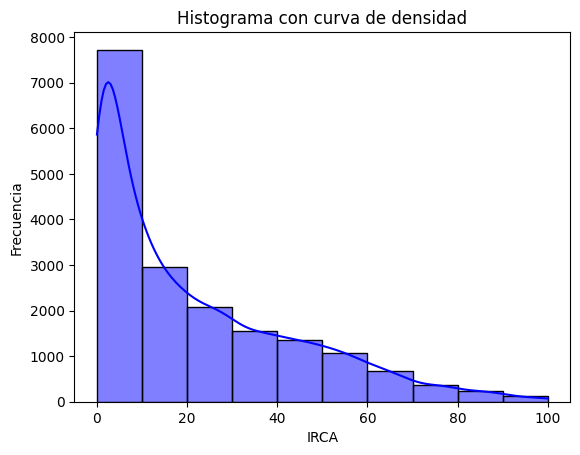

In [47]:
fig, ax = plt.subplots()
sns.histplot(df['irca_2'], kde=True, bins=10, color='blue')
plt.xlabel('IRCA')
plt.ylabel('Frecuencia')
plt.title('Histograma con curva de densidad')
plt.show()

<Axes: xlabel='año'>

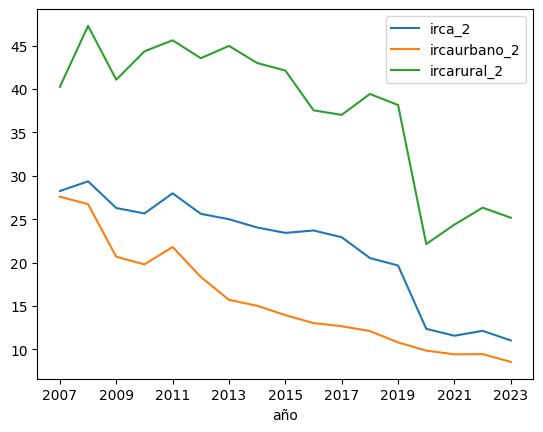

In [48]:
result_anio_irca = df[['a_o','irca_2','ircaurbano_2','ircarural_2']].groupby('a_o').mean()
result_anio_irca.plot(xlabel="año")

/tmp/ipykernel_3394/2702106348.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


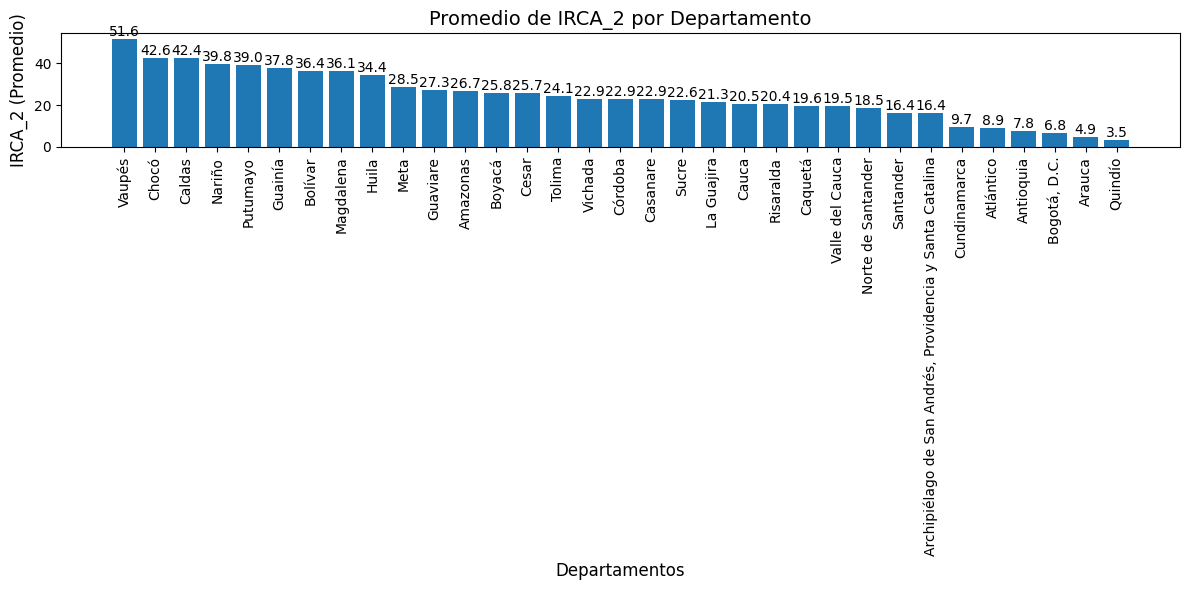

In [49]:
result = df[['departamento','irca_2','ircaurbano_2','ircarural_2']].groupby('departamento').mean()
result_sorted = result.sort_values(by="irca_2", ascending=False)

fig, ax = plt.subplots(figsize=(12,6), layout = 'constrained')
bars = ax.bar(result_sorted.index, result_sorted['irca_2'])

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', 
            ha='center', va='bottom', fontsize=10, color='black')

ax.set_xlabel('Departamentos', fontsize=12)
ax.set_ylabel('IRCA_2 (Promedio)', fontsize=12)
ax.set_title('Promedio de IRCA_2 por Departamento', fontsize=14)
ax.tick_params(axis='x', rotation=90) 
plt.tight_layout()

In [50]:
df[['departamento','municipio','irca_2','ircaurbano_2','ircarural_2']].groupby(['departamento','municipio']).mean()

irca_2  ircaurbano_2  ircarural_2
departamento municipio                                           
Amazonas     #TODOS          23.240000     24.038462    11.833333
             Leticia         21.686667     22.530769     4.700000
             Puerto Nariño   38.354545     40.244444    26.100000
Antioquia    #TODOS           7.429412      5.947059    10.582353
             Abejorral        3.600000      1.852941    57.550000
...                                ...           ...          ...
Vichada      #TODOS          20.664706     20.082353    41.983333
             Cumaribo        45.614286     44.114286          NaN
             La Primavera    15.100000     15.100000          NaN
             Puerto Carreño   6.118750      5.518750    41.983333
             Santa Rosalía   30.200000     30.200000          NaN

[1128 rows x 3 columns]

<Axes: xlabel='irca_2', ylabel='ircarural_2'>

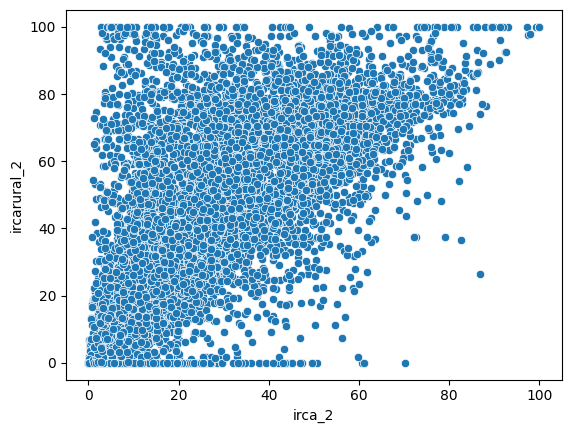

In [51]:
sns.scatterplot(data=df, x='irca_2', y='ircarural_2')

<Axes: xlabel='irca_2', ylabel='ircaurbano_2'>

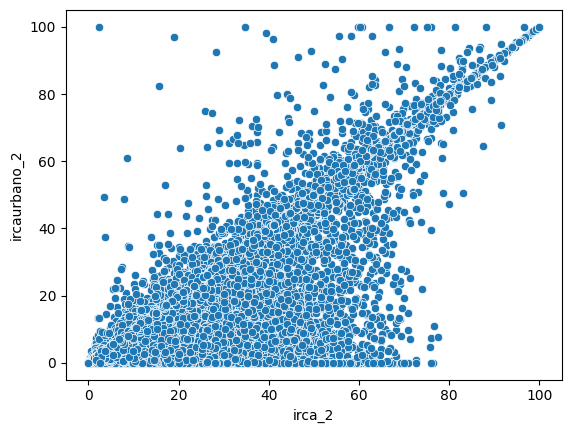

In [52]:
sns.scatterplot(data=df, x='irca_2', y='ircaurbano_2')

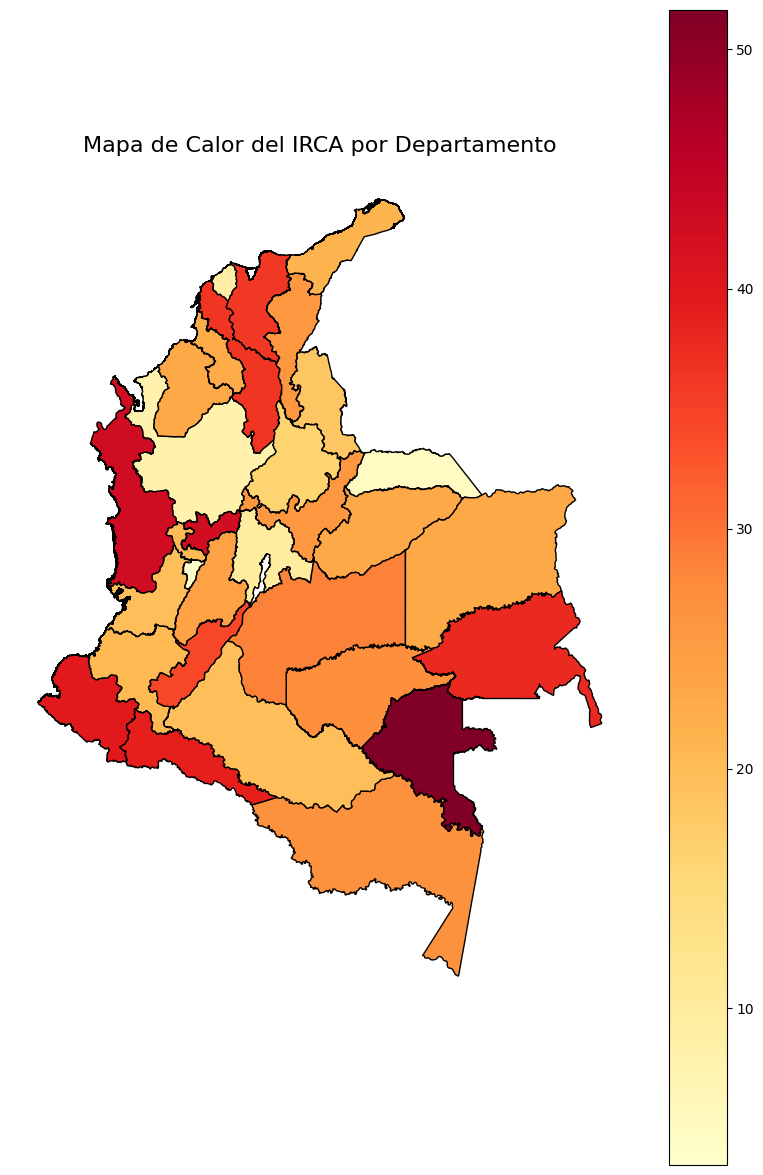

In [53]:
colombia_departamentos = colombia_map.dissolve(by='NAME_1', as_index=False)

colombia_departamentos = colombia_departamentos.merge(result, left_on='NAME_1',right_on='departamento', how='left')

# Crear el mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(10, 15))
colombia_departamentos.plot(column='irca_2', cmap='YlOrRd', legend=True, ax=ax, edgecolor='black')

# Títulos y configuración
ax.set_title("Mapa de Calor del IRCA por Departamento", fontsize=16)
ax.axis('off')

# Mostrar el mapa
plt.show()